In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [4]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [5]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [6]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()


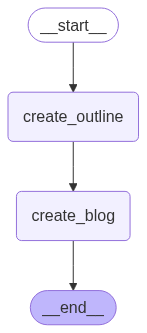

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'I. Introduction\n    A. Brief explanation of what AI (Artificial Intelligence) is\n    B. Overview of how AI has been steadily growing in India\n    C. Purpose of the blog - to explore the rise of AI in India and its implications\n\nII. Historical Context of AI in India\n    A. Early developments in AI in India\n    B. Government initiatives and policies to promote AI\n    C. Rise of AI startups in India\n\nIII. Current State of AI in India\n    A. Major industries leveraging AI technology in India\n    B. Indian companies leading the way in AI innovation\n    C. Impact of AI on the Indian economy and job market\n\nIV. Challenges and Opportunities\n    A. Challenges faced by AI adoption in India\n    B. Opportunities for growth and development in the AI sector\n    C. Importance of AI education and skill development in India\n\nV. Future Outlook\n    A. Predictions for the future of AI in India\n    B. Potential areas of growth and innovatio

In [9]:
print(final_state['outline'])

I. Introduction
    A. Brief explanation of what AI (Artificial Intelligence) is
    B. Overview of how AI has been steadily growing in India
    C. Purpose of the blog - to explore the rise of AI in India and its implications

II. Historical Context of AI in India
    A. Early developments in AI in India
    B. Government initiatives and policies to promote AI
    C. Rise of AI startups in India

III. Current State of AI in India
    A. Major industries leveraging AI technology in India
    B. Indian companies leading the way in AI innovation
    C. Impact of AI on the Indian economy and job market

IV. Challenges and Opportunities
    A. Challenges faced by AI adoption in India
    B. Opportunities for growth and development in the AI sector
    C. Importance of AI education and skill development in India

V. Future Outlook
    A. Predictions for the future of AI in India
    B. Potential areas of growth and innovation in AI
    C. Implications of AI on society and culture in India



In [10]:
print(final_state['content'])

I. Introduction

A. Artificial Intelligence (AI) is a branch of computer science that aims to create intelligent machines that can perform tasks that typically require human intelligence. These tasks can include speech recognition, decision-making, visual perception, and more. 

B. The field of AI has been steadily growing in India over the past few years, with advancements being made in various industries such as healthcare, finance, education, and more. 

C. The purpose of this blog is to explore the rise of AI in India and its implications on the economy, job market, society, and culture.

II. Historical Context of AI in India

A. India has a rich history in AI research, with institutions like the Indian Institute of Technology (IIT) and the Indian Statistical Institute (ISI) making significant contributions to the field. 

B. The Indian government has also taken steps to promote AI development in the country, with initiatives like the National AI Portal and the National Mission on 